In [38]:
!pip install mtcnn

You should consider upgrading via the 'c:\users\juanl\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
import cv2
from mtcnn import MTCNN

In [2]:
matstruct_contents = sio.loadmat("raw_data/EMOTIC DATASET/Annotations/Annotations.mat")

In [40]:
teststruct_train = matstruct_contents['train']

In [42]:
teststruct_val = matstruct_contents['val']

In [39]:
teststruct_test = matstruct_contents['test']

In [45]:
teststruct_train.dtype

dtype([('filename', 'O'), ('folder', 'O'), ('image_size', 'O'), ('original_database', 'O'), ('person', 'O')])

In [46]:
teststruct_train[0,0]["filename"]

array(['COCO_val2014_000000562243.jpg'], dtype='<U29')

In [47]:
teststruct_train[0,0]["image_size"]

array([[(array([[640]], dtype=uint16), array([[640]], dtype=uint16))]],
      dtype=[('n_col', 'O'), ('n_row', 'O')])

In [48]:
teststruct_train[0,0]["original_database"]

array([[(array(['mscoco'], dtype='<U6'), array([[(array([[562243]]), array([[448867]]))]],
      dtype=[('image_id', 'O'), ('annotations_id', 'O')]))]],
      dtype=[('name', 'O'), ('info', 'O')])

In [49]:
teststruct_train[0,0]["person"]

array([[(array([[ 86,  58, 564, 628]], dtype=uint16), array([[(array([[array(['Disconnection'], dtype='<U13'),
        array(['Doubt/Confusion'], dtype='<U15')]], dtype=object),)]],
      dtype=[('categories', 'O')]), array([[(array([[5]], dtype=uint8), array([[3]], dtype=uint8), array([[9]], dtype=uint8))]],
      dtype=[('valence', 'O'), ('arousal', 'O'), ('dominance', 'O')]), array(['Male'], dtype='<U4'), array(['Adult'], dtype='<U5'))]],
      dtype=[('body_bbox', 'O'), ('annotations_categories', 'O'), ('annotations_continuous', 'O'), ('gender', 'O'), ('age', 'O')])

In [50]:
teststruct_train[0,0]["person"][0][0][0] #Body BBox

array([[ 86,  58, 564, 628]], dtype=uint16)

In [66]:
teststruct_train[0,200]["person"][0][0][1].flatten()[0] #Annotations Categories 1

(array([[array(['Affection'], dtype='<U9'),
        array(['Excitement'], dtype='<U10'),
        array(['Happiness'], dtype='<U9'),
        array(['Pleasure'], dtype='<U8'),
        array(['Sympathy'], dtype='<U8')]], dtype=object),)

In [51]:
teststruct_train[0,0]["person"][0][0][1].flatten()[0] #Annotations Categories 1

(array([[array(['Disconnection'], dtype='<U13'),
        array(['Doubt/Confusion'], dtype='<U15')]], dtype=object),)

In [61]:
teststruct_train[0,0]["person"][0][0][2] #Annotations Continuous

array([[(array([[5]], dtype=uint8), array([[3]], dtype=uint8), array([[9]], dtype=uint8))]],
      dtype=[('valence', 'O'), ('arousal', 'O'), ('dominance', 'O')])

In [62]:
teststruct_train[0,0]["person"][0][0][3] #Gender

array(['Male'], dtype='<U4')

In [63]:
teststruct_train[0,0]["person"][0][0][4] #Age

array(['Adult'], dtype='<U5')

In [13]:
df = pd.DataFrame({"folder":"ds", "filename": "dfdf.jpg", "sentiment":"peace"})
df.head()

ValueError: If using all scalar values, you must pass an index

In [55]:
teststruct_test[0,0]["person"][0][0][2] #Combined Categories

array([[array(['Affection'], dtype='<U9'),
        array(['Confidence'], dtype='<U10'),
        array(['Engagement'], dtype='<U10'),
        array(['Happiness'], dtype='<U9'), array(['Peace'], dtype='<U5'),
        array(['Pleasure'], dtype='<U8')]], dtype=object)

In [60]:
teststruct_test[0,0]["person"][0][0][3] #Annotations Continuous

array([[(array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[7]], dtype=uint8)),
        (array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[3]], dtype=uint8)),
        (array([[6]], dtype=uint8), array([[5]], dtype=uint8), array([[7]], dtype=uint8))]],
      dtype=[('valence', 'O'), ('arousal', 'O'), ('dominance', 'O')])

In [40]:
detector = MTCNN()

In [27]:
def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [25]:
def get_all_faces(img):
    results = detector.detect_faces(img)
    caras = []
    
    for i in results:
        # caja de la cara
        x, y, w, h = i['box']

        cara = img[y: y+h, x: x+w]
        
        caras.append(cara)
        
    return caras, results

In [35]:
def draw_box(image, box=None, all_boxes=None, color=(0, 255, 0)):
    canvas = image.copy()
    
    if all_boxes != None:
        for b in all_boxes:
            x, y, w, h = b['box']
            cv2.rectangle(canvas, (x, y), (x+w, y+h), (255,0,0), 5)
    
    if box != None:
        # caja de la cara en azul
        x, y, w, h = box['box']
        cv2.rectangle(canvas, (x, y), (x+w, y+h), color, 5)
    
    return canvas

In [48]:
def save_img(img, filepath, rgb=True):
    if rgb == True:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return cv2.imwrite(filepath, img)

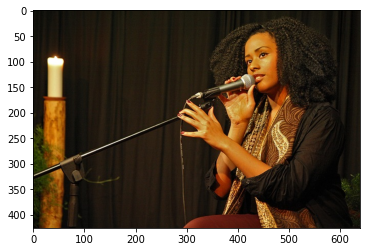

In [34]:
image = read_image('raw_data/EMOTIC DATASET/emotic/framesdb/images/'+teststruct[0,0]["filename"][0])
plt.imshow(image)

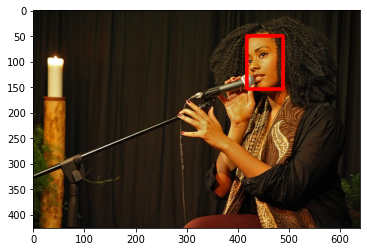

In [41]:
faces, res = get_all_faces(image)
plt.imshow(draw_box(image, None, all_boxes=res, color=(0,0,255)))

In [49]:
save_img(faces[0], "faces/"+teststruct[0,0]["filename"][0])

True